In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Path to the data folders
raw_data_folder = '../data/RAW/'
clean_data_folder = '../data/CLEAN/'

## First: we loead the dataset

In [38]:
# Load the movie metadata
CMU_movie_metadata = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/movie.metadata.tsv', delimiter='\t', header=None)
CMU_movie_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
CMU_movie_metadata.head(10)

# Load the plot summaries
CMU_plot_summary = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/plot_summaries.txt', sep='\t', header=None)
CMU_plot_summary.columns = ['wikipedia_movie_ID', 'plot_summary']

## 0: Here's Emma playground, go to section 1 for serious stuff

In [39]:
#display(CMU_movie_metadata)
display(CMU_plot_summary)

display(CMU_plot_summary['plot_summary'][34])
print(CMU_plot_summary['wikipedia_movie_ID'][34])

,wikipedia_movie_ID,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


'In 1942, a 10 year old boy named Timmy plays with a jigsaw puzzle of a nude woman when his mother walks in. She chastises him for it. The mother orders Timmy to get a plastic bag because "I\'m gonna burn everything." Timmy gruesomely murders her with an axe instead of getting the plastic bag. The police later arrive at the house and Timmy is finishing the puzzle. The police break into the house through the front door. Timmy then hides in one of the closets. The police then enter into the bedroom, they find a bloody mess all over the room and also find the mother\'s head inside one of the closets. The police hear Timmy weeping in the another closet, so they open the door and find him covered in blood. The police question the whereabouts of the father; the nanny replies hesitantly and lying obviously that he is in Europe with the Air Force, but the nanny also says that Timmy has an aunt, who lives an hour away and also the nanny says that she will call Timmy\'s aunt and that the nanny w

8471210


In [6]:
#type(CMU_plot_summary['plot_summary'][34]) to find out the type, Emma
my_string = CMU_plot_summary['plot_summary'][34]

my_string = CMU_plot_summary['plot_summary'][0]
print(my_string)
my_string.count("bizarre")

Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.


1

In [40]:
# ici c'est juste un test, pour voir si ça marche. voir prochaine cellule pour du sérieux
violent_words_list = ["acid", "aggressor", "agitator", "aim", "alert", "ambush", "ammunition", "anarchy", "anguish", "annihilate", "nude"]

CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(violent_words_list[10]))

0        0
1        0
2        0
3        0
4        0
        ..
42298    0
42299    0
42300    0
42301    0
42302    0
Name: plot_summary, Length: 42303, dtype: int64

In [7]:
# voilà, ici c'est du sérieux
findings = pd.DataFrame()

violent_words_list = [
    "acid", "aggressor", "agitator", "aim", "alert", "ambush", "ammunition", "anarchy", "anguish", 
    "annihilate", "apartheid", "arms", "arsenal", "artillery", "assassin", "assassinate", "assault", 
    "atrocity", "attack", "authority", "automatic", "barrage", "barricade", "battle", "battlefield", 
    "belligerent", "betrayal", "blast", "blindside", "blood", "bloody", "bomb", "bombardment", 
    "booby trap", "breach", "break", "brutal", "brutality", "brute", "bullet", "bully", "burn", 
    "cadaver", "camouflage", "campaign", "captive", "capture", "careen", "carnage", "casualties", 
    "cataclysm", "causes", "chaos", "charge", "charred", "checking", "clandestine", "clash", "coalition", 
    "collapse", "combat", "commandos", "concentration", "concussion", "conflagration", "conflict", 
    "confrontation", "conquer", "consequences", "consolidate", "conspiracy", "conspire", "control", 
    "coordinates", "corpse", "counterattack", "countermand", "crash", "crime", "crisis", "cross-hairs", 
    "culpability", "damage", "danger", "dangerous", "dash", "dead", "deadly", "death", "debacle", 
    "deception", "deliberate", "demolish", "demoralize", "despot", "destroy", "destruction", "detect", 
    "detection", "devastation", "device", "dictator", "dictatorship", "die", "disarmament", "disaster", 
    "disastrous", "discipline", "disease", "dispute", "disruption", "dissonance", "division", "domination", 
    "doom", "downfall", "drama", "dread", "encounter", "enemy", "enforce", "engagement", "epithet", 
    "escalate", "excess", "execute", "execution", "expectations", "explode", "exploitation", "explosion", 
    "explosive", "expunge", "extremism", "faction", "fanatic", "fatal", "fear", "fearful", "felon", 
    "ferment", "ferocious", "feud", "fierce", "fiery", "fight", "fighter", "force", "forceful", "forces", 
    "fray", "frenzy", "front lines", "fuel", "fugitive", "furtive", "gang", "gang up on", "gas", 
    "genocide", "germ warfare", "grave", "grenade", "grievous", "groans", "guard", "guerrillas", 
    "guided bombs", "guns", "gunship", "hammering", "harass", "harsh", "hatch", "hate", "hatred", 
    "hazard", "hiding", "hijack", "hijacker", "hit", "hit-and-run", "holocaust", "horror", "hostility", 
    "howitzer", "hurt", "ignite", "impact", "improvise", "incident", "incite", "incontrovertible", 
    "infanticide", "infiltrate", "inflame", "informant", "injuries", "inmate", "insurgent", "insurrection", 
    "intense", "intercept", "interdiction", "international", "interrogation", "intervene", "intimidate", 
    "invasion", "investigate", "investigations", "involvement", "ire", "jail", "jeer", "jets", "join", 
    "kamikaze", "keen", "kidnap", "killing", "knife", "knock-out", "land mines", "laser-activated", 
    "launch", "launcher", "loathsome", "machine guns", "maim", "malevolent", "malicious", "maraud", 
    "march", "massacre", "mayhem", "megalomania", "menace", "militancy", "militant", "militaristic", 
    "military", "militia", "mines", "missile", "mission", "mistreatment", "mob", "mobile", "mobilization", 
    "momentum", "mortars", "munitions", "murder", "muscle", "nationalist", "neutralize", "nightmare", 
    "nitrate", "notorious", "offensive", "officials", "onerous", "operation", "opposition", "order", 
    "out of control", "outbreak", "overrun", "overthrow", "pacify", "partisan", "patrol", "penetrate", 
    "perform", "persecute", "petrify", "photos", "pilot", "pistol", "planes", "plunder", "position", 
    "post-traumatic", "potent", "pound", "powder", "power", "powerful", "preemptive", "premeditate", 
    "prey", "prison", "prisoner", "proliferation", "provocation", "prowl", "pugnacious", "pulverize", 
    "pushing", "quail", "quarrel", "quell", "quiver", "radiation", "radical", "rage", "ravage", "ravish", 
    "rebel", "rebellion", "reconnaissance", "recovery", "recruit", "refugee", "regime", "regiment", 
    "reinforcements", "relentless", "reparation", "reprisal", "reputation", "resistance", "retaliation", 
    "retreat", "retribution", "revenge", "revolution", "ricochet", "rifle", "rift", "riot", "rival", 
    "rocket", "rot", "rounds", "rule", "ruthless", "sabotage", "sacrifice", "salvage", "sanction", 
    "savage", "scare", "score", "scramble", "secrecy", "secret", "sedition", "seize", "seizure", 
    "sensor", "setback", "shelling", "shells", "shock", "shoot", "shot", "showdown", "siege", "skirmish", 
    "slaughter", "smash", "smuggle", "soldier", "special-ops", "specialized", "spy", "spy satellite", 
    "squad", "stalk", "stash", "stealth", "storm", "straggler", "strangle", "strategic", "strategist", 
    "strategy", "strength", "strife", "strike", "strip", "stronghold", "struggle", "subversive", 
    "suffering", "superstition", "supplies", "support", "suppression", "surprise", "surrender", 
    "survival", "survivor", "suspect", "tactics", "tank", "target", "tension", "terror", "terrorism", 
    "terrorist", "terrorize", "threaten", "thug", "thwart", "topple", "torch", "tornado", "torpedo", 
    "tourniquet", "tragic", "training", "trample", "trap", "trauma", "treachery", "trench", "trigger", 
    "triumph", "tsunami", "turbulent", "unbelievable", "unconventional", "unleash", "unruly", 
    "uprising", "urgency", "vagrant", "vanguard", "vanish", "vehicle", "vehicular", "vendetta", 
    "venomous", "vicious", "victory", "vile", "vilify", "violation", "violence", "virulence", "vital", 
    "vitriol", "vociferous", "void", "vow", "vulnerability", "wage", "war", "warheads", "warplane", 
    "warrant", "warrior", "watchdog", "watchful", "weapon", "weather", "well-trained", "wisdom", 
    "worldwide", "wound", "wreckage", "x-ray", "yearn", "yelling", "zeal", "zealot", "zigzag", "zone"
]


for word in violent_words_list:
    findings[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))

display(findings)

/var/folders/7l/t066gdks7_dcd1c7cjw5nmph0000gn/T/ipykernel_7999/1755367976.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  findings[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))
/var/folders/7l/t066gdks7_dcd1c7cjw5nmph0000gn/T/ipykernel_7999/1755367976.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  findings[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))
/var/folders/7l/t066gdks7_dcd1c7cjw5nmph0000gn/T/ipykernel_7999/1755367976.py:65: Performa

,acid,aggressor,agitator,aim,alert,ambush,ammunition,anarchy,anguish,annihilate,...,worldwide,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


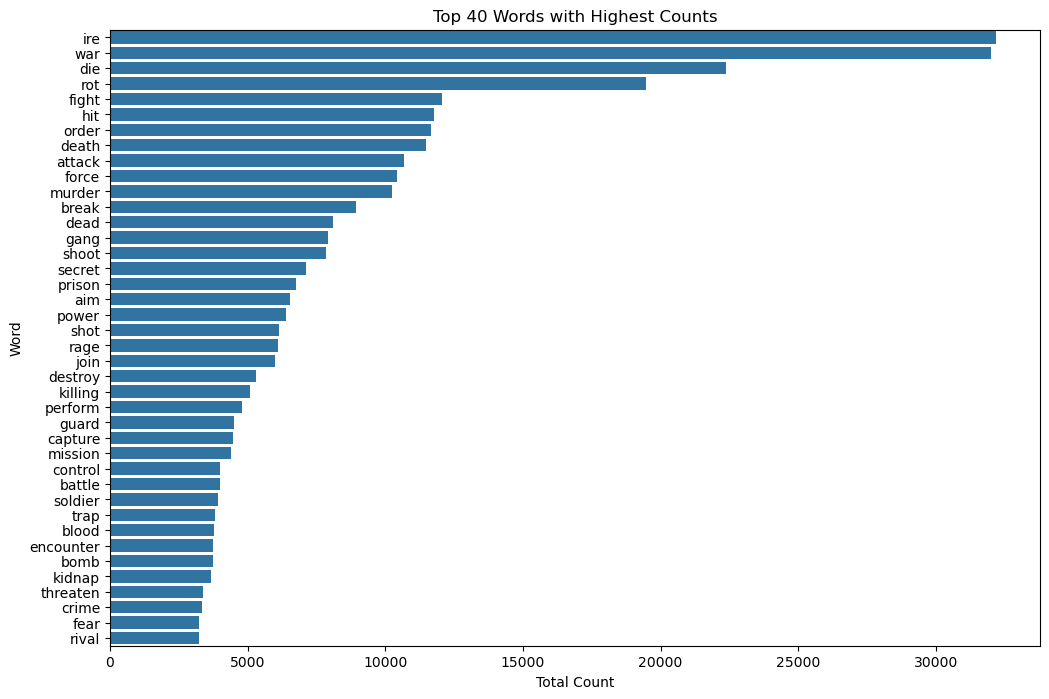

In [8]:
# Sum the word counts across all rows for each word
word_counts_per_column = findings.sum(axis=0)

# Sort the word counts in descending order and select the top N words
top_n_words = 40
top_words = word_counts_per_column.sort_values(ascending=False).head(top_n_words)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title(f"Top {top_n_words} Words with Highest Counts")
plt.xlabel("Total Count")
plt.ylabel("Word")
plt.show()

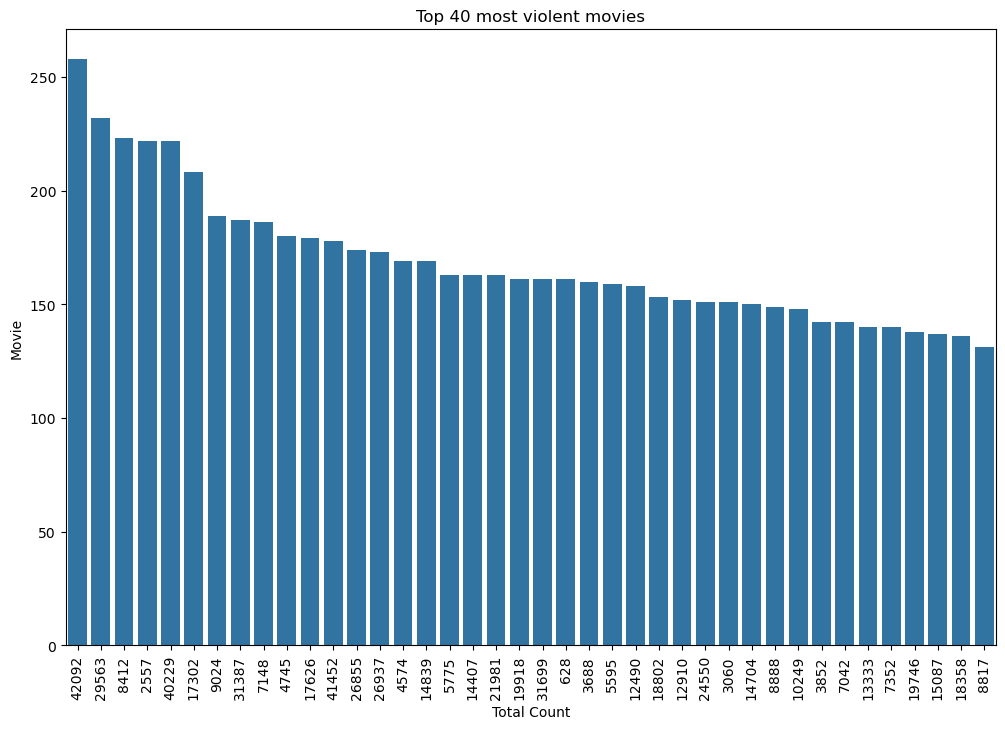

In [9]:
# Most violent movies

word_counts_per_movie = findings.sum(axis=1)

# Sort the word counts in descending order and select the top N movies (most violent)
top_n_movies = 40
top_movies = word_counts_per_movie.sort_values(ascending=False).head(top_n_words)

order = top_movies.index

# vu qu'il ne veut pas collaborer
top_movies = top_movies.reset_index()
top_movies.columns = ['movie id', 'violent words (all) count']

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='movie id', y='violent words (all) count', data=top_movies, order=order)
plt.title(f"Top {top_n_words} most violent movies")
plt.xlabel("Total Count")
plt.ylabel("Movie")
plt.xticks(rotation=90)
plt.show()

## 1: Essayons de faire ça un peu propre

In [41]:
violent_words_list = [
    "acid", "aggressor", "agitator", "aim", "alert", "ambush", "ammunition", "anarchy", "anguish", 
    "annihilate", "apartheid", "arms", "arsenal", "artillery", "assassin", "assassinate", "assault", 
    "atrocity", "attack", "authority", "automatic", "barrage", "barricade", "battle", "battlefield", 
    "belligerent", "betrayal", "blast", "blindside", "blood", "bloody", "bomb", "bombardment", 
    "booby trap", "breach", "break", "brutal", "brutality", "brute", "bullet", "bully", "burn", 
    "cadaver", "camouflage", "campaign", "captive", "capture", "careen", "carnage", "casualties", 
    "cataclysm", "causes", "chaos", "charge", "charred", "checking", "clandestine", "clash", "coalition", 
    "collapse", "combat", "commandos", "concentration", "concussion", "conflagration", "conflict", 
    "confrontation", "conquer", "consequences", "consolidate", "conspiracy", "conspire", "control", 
    "coordinates", "corpse", "counterattack", "countermand", "crash", "crime", "crisis", "cross-hairs", 
    "culpability", "damage", "danger", "dangerous", "dash", "dead", "deadly", "death", "debacle", 
    "deception", "deliberate", "demolish", "demoralize", "despot", "destroy", "destruction", "detect", 
    "detection", "devastation", "device", "dictator", "dictatorship", "die", "disarmament", "disaster", 
    "disastrous", "discipline", "disease", "dispute", "disruption", "dissonance", "division", "domination", 
    "doom", "downfall", "drama", "dread", "encounter", "enemy", "enforce", "engagement", "epithet", 
    "escalate", "excess", "execute", "execution", "expectations", "explode", "exploitation", "explosion", 
    "explosive", "expunge", "extremism", "faction", "fanatic", "fatal", "fear", "fearful", "felon", 
    "ferment", "ferocious", "feud", "fierce", "fiery", "fight", "fighter", "force", "forceful", "forces", 
    "fray", "frenzy", "front lines", "fuel", "fugitive", "furtive", "gang", "gang up on", "gas", 
    "genocide", "germ warfare", "grave", "grenade", "grievous", "groans", "guard", "guerrillas", 
    "guided bombs", "guns", "gunship", "hammering", "harass", "harsh", "hatch", "hate", "hatred", 
    "hazard", "hiding", "hijack", "hijacker", "hit", "hit-and-run", "holocaust", "horror", "hostility", 
    "howitzer", "hurt", "ignite", "impact", "improvise", "incident", "incite", "incontrovertible", 
    "infanticide", "infiltrate", "inflame", "informant", "injuries", "inmate", "insurgent", "insurrection", 
    "intense", "intercept", "interdiction", "international", "interrogation", "intervene", "intimidate", 
    "invasion", "investigate", "investigations", "involvement", "ire", "jail", "jeer", "jets", "join", 
    "kamikaze", "keen", "kidnap", "killing", "knife", "knock-out", "land mines", "laser-activated", 
    "launch", "launcher", "loathsome", "machine guns", "maim", "malevolent", "malicious", "maraud", 
    "march", "massacre", "mayhem", "megalomania", "menace", "militancy", "militant", "militaristic", 
    "military", "militia", "mines", "missile", "mission", "mistreatment", "mob", "mobile", "mobilization", 
    "momentum", "mortars", "munitions", "murder", "muscle", "nationalist", "neutralize", "nightmare", 
    "nitrate", "notorious", "offensive", "officials", "onerous", "operation", "opposition", "order", 
    "out of control", "outbreak", "overrun", "overthrow", "pacify", "partisan", "patrol", "penetrate", 
    "perform", "persecute", "petrify", "photos", "pilot", "pistol", "planes", "plunder", "position", 
    "post-traumatic", "potent", "pound", "powder", "power", "powerful", "preemptive", "premeditate", 
    "prey", "prison", "prisoner", "proliferation", "provocation", "prowl", "pugnacious", "pulverize", 
    "pushing", "quail", "quarrel", "quell", "quiver", "radiation", "radical", "rage", "ravage", "ravish", 
    "rebel", "rebellion", "reconnaissance", "recovery", "recruit", "refugee", "regime", "regiment", 
    "reinforcements", "relentless", "reparation", "reprisal", "reputation", "resistance", "retaliation", 
    "retreat", "retribution", "revenge", "revolution", "ricochet", "rifle", "rift", "riot", "rival", 
    "rocket", "rot", "rounds", "rule", "ruthless", "sabotage", "sacrifice", "salvage", "sanction", 
    "savage", "scare", "score", "scramble", "secrecy", "secret", "sedition", "seize", "seizure", 
    "sensor", "setback", "shelling", "shells", "shock", "shoot", "shot", "showdown", "siege", "skirmish", 
    "slaughter", "smash", "smuggle", "soldier", "special-ops", "specialized", "spy", "spy satellite", 
    "squad", "stalk", "stash", "stealth", "storm", "straggler", "strangle", "strategic", "strategist", 
    "strategy", "strength", "strife", "strike", "strip", "stronghold", "struggle", "subversive", 
    "suffering", "superstition", "supplies", "support", "suppression", "surprise", "surrender", 
    "survival", "survivor", "suspect", "tactics", "tank", "target", "tension", "terror", "terrorism", 
    "terrorist", "terrorize", "threaten", "thug", "thwart", "topple", "torch", "tornado", "torpedo", 
    "tourniquet", "tragic", "training", "trample", "trap", "trauma", "treachery", "trench", "trigger", 
    "triumph", "tsunami", "turbulent", "unbelievable", "unconventional", "unleash", "unruly", 
    "uprising", "urgency", "vagrant", "vanguard", "vanish", "vehicle", "vehicular", "vendetta", 
    "venomous", "vicious", "victory", "vile", "vilify", "violation", "violence", "virulence", "vital", 
    "vitriol", "vociferous", "void", "vow", "vulnerability", "wage", "war", "warheads", "warplane", 
    "warrant", "warrior", "watchdog", "watchful", "weapon", "weather", "well-trained", "wisdom", 
    "worldwide", "wound", "wreckage", "x-ray", "yearn", "yelling", "zeal", "zealot", "zigzag", "zone"
]


In [42]:
#for word in violent_words_list:
#    CMU_plot_summary[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))

# add the title column for later
CMU_plot_summary = CMU_plot_summary.merge(CMU_movie_metadata[['wikipedia_movie_ID', 'movie_name']], on='wikipedia_movie_ID', how='left')

word_counts = {word: CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word)) for word in violent_words_list}
word_counts_df = pd.DataFrame(word_counts)
CMU_plot_summary = pd.concat([CMU_plot_summary, word_counts_df], axis=1)

display(CMU_plot_summary)

,wikipedia_movie_ID,plot_summary,movie_name,acid,aggressor,agitator,aim,alert,ambush,ammunition,...,worldwide,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,0,0,0,2,0,1,0,...,0,2,0,0,0,0,0,0,0,0
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
word_columns = CMU_plot_summary.columns.difference(['wikipedia_movie_ID', 'plot_summary', 'movie_name', 'total_violent_words'])

# Sum across columns (per movie) to get the total appearances of all words in each summary
CMU_plot_summary['total_violent_words'] = CMU_plot_summary[word_columns].astype(int).sum(axis=1)

#  Sum across rows (per word) to get the total appearances of each word across all summaries
first_conclusions = pd.DataFrame()
first_conclusions['total_movies_appearances'] = CMU_plot_summary[word_columns].sum(axis=0)

In [44]:
display(CMU_plot_summary)
display(first_conclusions)

,wikipedia_movie_ID,plot_summary,movie_name,acid,aggressor,agitator,aim,alert,ambush,ammunition,...,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone,total_violent_words
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,0,0,0,2,0,1,0,...,2,0,0,0,0,0,0,0,0,48
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,32
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


,total_movies_appearances
acid,240
aggressor,12
agitator,13
aim,6536
alert,688
...,...
yelling,187
zeal,234
zealot,24
zigzag,27


ire          32166
war          32010
die          22373
rot          19476
fight        12050
hit          11754
order        11645
death        11488
attack       10677
force        10413
murder       10229
break         8948
dead          8115
gang          7912
shoot         7853
secret        7137
prison        6757
aim           6536
power         6387
shot          6154
rage          6107
join          5984
destroy       5294
killing       5080
perform       4781
guard         4491
capture       4486
mission       4383
control       3998
battle        3982
soldier       3920
trap          3828
blood         3769
encounter     3741
bomb          3737
kidnap        3657
threaten      3382
crime         3341
fear          3243
rival         3238
Name: total_movies_appearances, dtype: int64

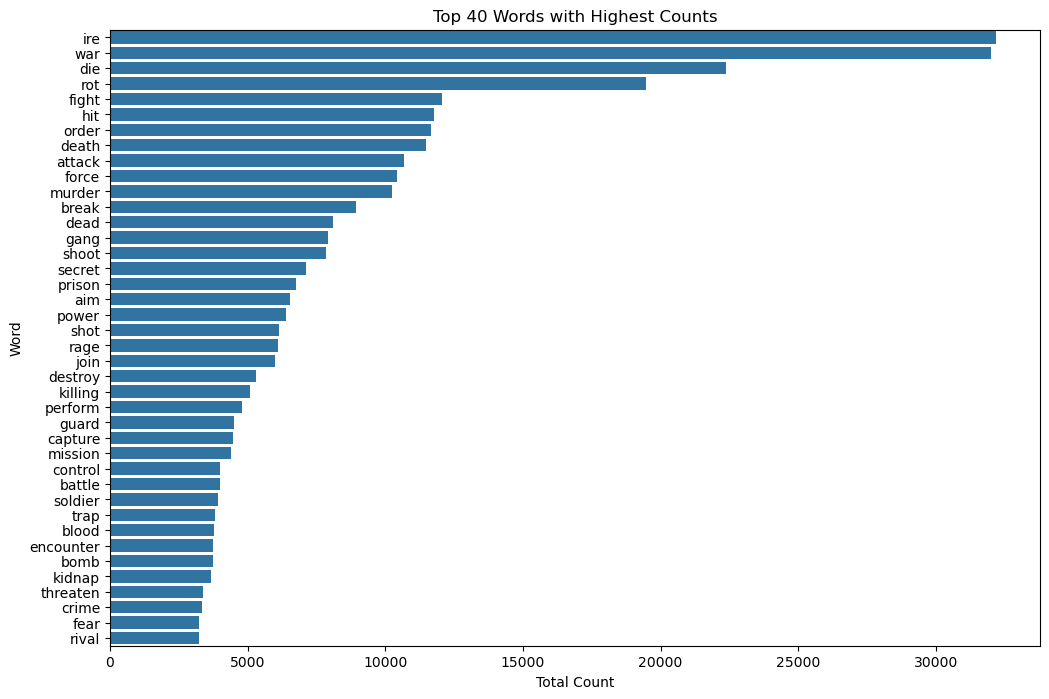

In [47]:
top_n_words = 40
top_words = first_conclusions['total_movies_appearances'].sort_values(ascending=False).head(top_n_words)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title(f"Top {top_n_words} Words with Highest Counts")
plt.xlabel("Total Count")
plt.ylabel("Word")
plt.show()

,wikipedia_movie_ID,plot_summary,movie_name,acid,aggressor,agitator,aim,alert,ambush,ammunition,...,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone,total_violent_words
42092,17798387,{{Plot}} GP: Guard Post is on the frontline in...,The Guard Post,0,0,0,1,0,0,0,...,2,0,0,0,0,0,0,0,1,258
29563,180606,The plot-summaries of the shorts are listed be...,The Animatrix,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,232
8412,1192473,{{plot|dateBackground27&seriescode=NGE Invid C...,Robotech: The Shadow Chronicles,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,223
2557,11103867,"The story begins with Teru Aoki , the main pr...",Dragon Head,0,1,0,0,0,0,1,...,10,0,0,0,0,0,0,0,0,222
40229,35099643,The film opens with a montage of some of the ...,Banned From Television,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,222
17302,10619079,Episode 1: A New Life FormVajra>Vajra is a San...,Genocyber,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,208
9024,28443267,The film begins in Seattle. Seattle police off...,In the Line of Duty 4: Witness,0,0,0,4,0,5,0,...,2,0,0,0,0,0,0,0,0,189
31387,15591569,"The year is 1946. World War II is over, but it...",Liquidation,0,0,0,1,0,3,0,...,0,0,0,0,0,0,0,0,0,187
7148,4969625,"* Episode 1 - Young Southerner Orry Main, th...",North and South,0,0,0,0,0,0,2,...,5,0,0,0,0,0,0,0,0,186
4745,1634487,"{| class""width:100%; margin:right;"" |- ! !! En...",Les Vampires,0,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,180


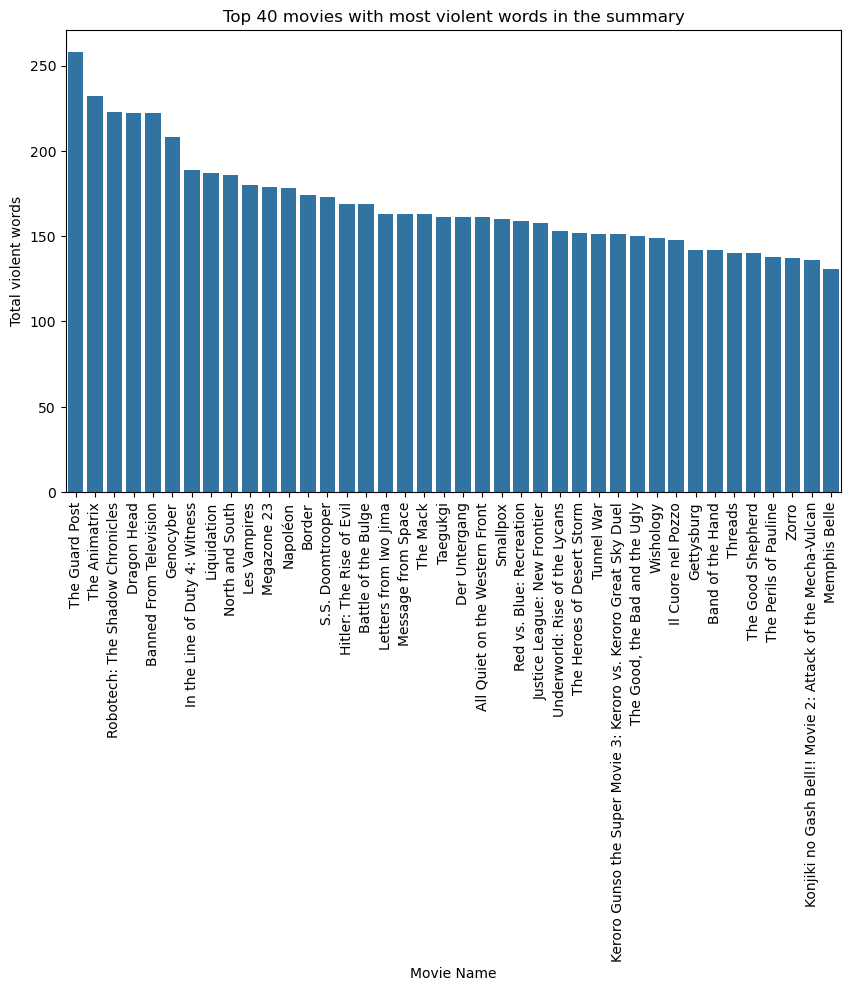

In [48]:

CMU_plot_summary_sorted_by_violent_words = CMU_plot_summary.sort_values(by='total_violent_words', ascending=False)

top_movies = CMU_plot_summary_sorted_by_violent_words.head(40)

display(top_movies)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_violent_words'], order=top_movies.movie_name) # this order works!!
plt.xlabel("Movie Name")
plt.ylabel("Total violent words")
plt.title("Top 40 movies with most violent words in the summary")
plt.xticks(rotation=90)
plt.show()

## 2: Here is an analysis by genre, with the aim of discarding the genres that are not violent at all (according to our classification based on keywords)